# Sales Prediction Using Python

* Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
* In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let' s embark on the journey of sales prediction using machine learning in Python.

Dataset: [dataset.csv](https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input)

# Loading and Exploring the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

# Load the CSV file
path = '/content/drive/MyDrive/CodSoft/Task 4/advertising.csv'
df = pd.read_csv(path, encoding='latin1')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [8]:
df.duplicated().sum()

0

# Data Visualization

# Libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Histogram Subplots

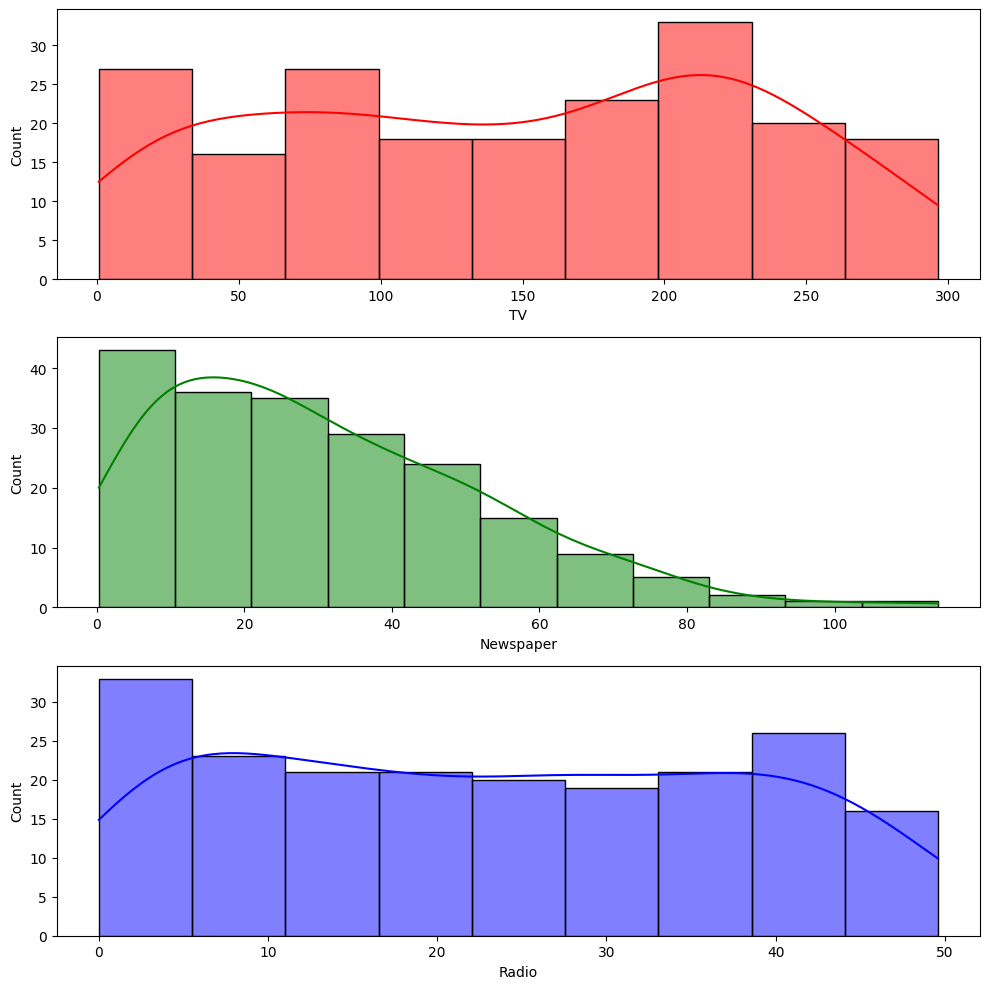

In [17]:
fig, axs = plt.subplots (3, figsize = (10,10))

plt1 = sns.histplot(df['TV'], color='red', kde=True, ax = axs[0])
plt2 = sns.histplot(df['Newspaper'], color='green', kde=True, ax = axs[1])
plt3 = sns.histplot(df['Radio'], color='blue', kde=True, ax = axs [2])
plt.tight_layout()

# Sales Distribution

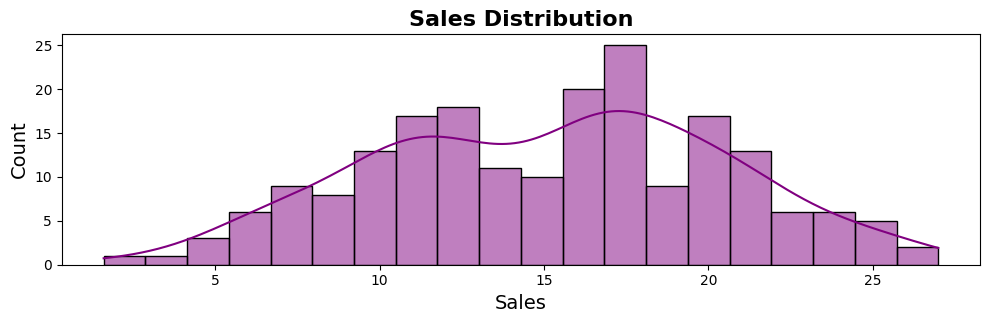

In [43]:
fig, axs = plt.subplots(1, figsize=(10, 3.33))

sns.histplot(df['Sales'], bins=20, kde=True, color='purple', edgecolor='black', linewidth=1, ax=axs)

axs.set_title('Sales Distribution', fontsize=16, weight='bold', loc='center')
axs.set_xlabel('Sales', fontsize=14)
axs.set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

# Scatter Plots

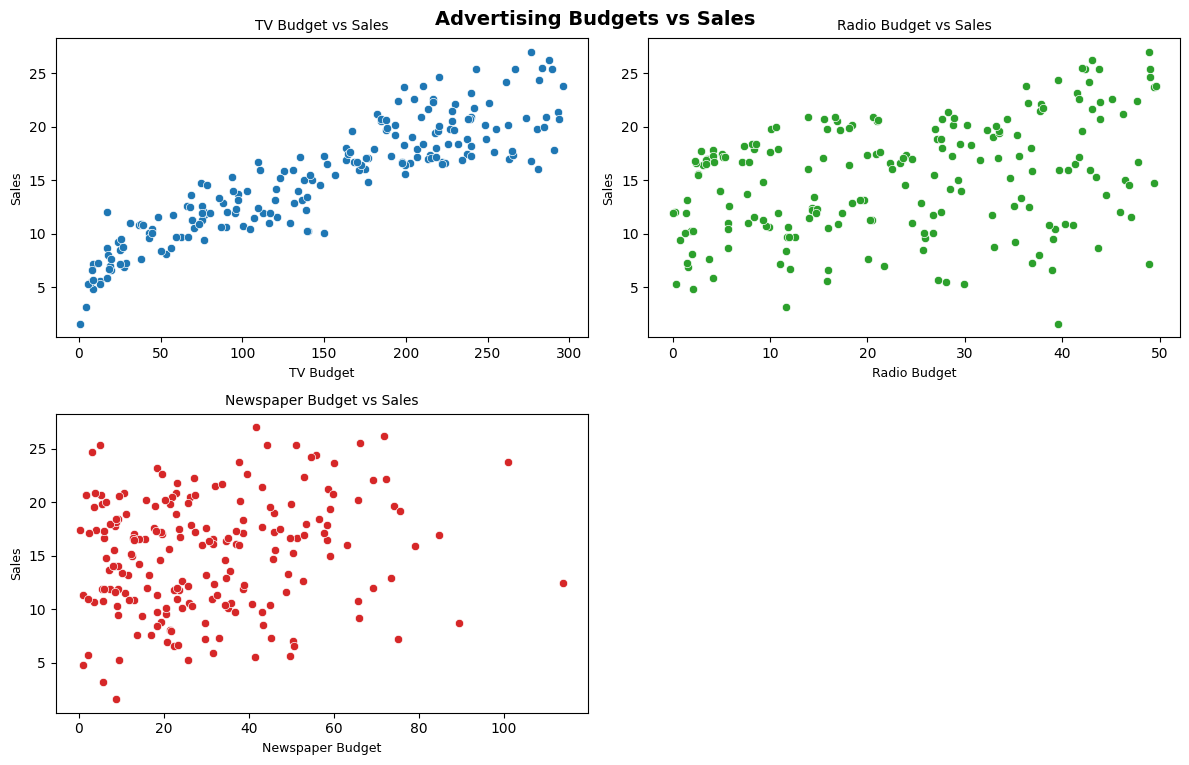

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Advertising Budgets vs Sales", fontsize=14, fontweight='bold', y=0.95)

sns.scatterplot(ax=axes[0, 0], x='TV', y='Sales', data=df, color='#1f77b4')
axes[0, 0].set_title("TV Budget vs Sales", fontsize=10)
axes[0, 0].set_xlabel("TV Budget", fontsize=9)
axes[0, 0].set_ylabel("Sales", fontsize=9)

sns.scatterplot(ax=axes[0, 1], x='Radio', y='Sales', data=df, color='#2ca02c')
axes[0, 1].set_title("Radio Budget vs Sales", fontsize=10)
axes[0, 1].set_xlabel("Radio Budget", fontsize=9)
axes[0, 1].set_ylabel("Sales", fontsize=9)

sns.scatterplot(ax=axes[1, 0], x='Newspaper', y='Sales', data=df, color='#d62728')
axes[1, 0].set_title("Newspaper Budget vs Sales", fontsize=10)
axes[1, 0].set_xlabel("Newspaper Budget", fontsize=9)
axes[1, 0].set_ylabel("Sales", fontsize=9)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Box Plots

In [44]:
melted_data = df.melt(id_vars='Sales', value_vars=['TV', 'Radio', 'Newspaper'],
                        var_name='Advertising Channel', value_name='Budget')

fig = px.box(melted_data, x='Advertising Channel', y='Budget', color='Advertising Channel',
             title='Distribution of Advertising Budgets Across Channels',
             labels={'Budget': 'Budget (in $1000s)', 'Advertising Channel': 'Channel'})

fig.show()

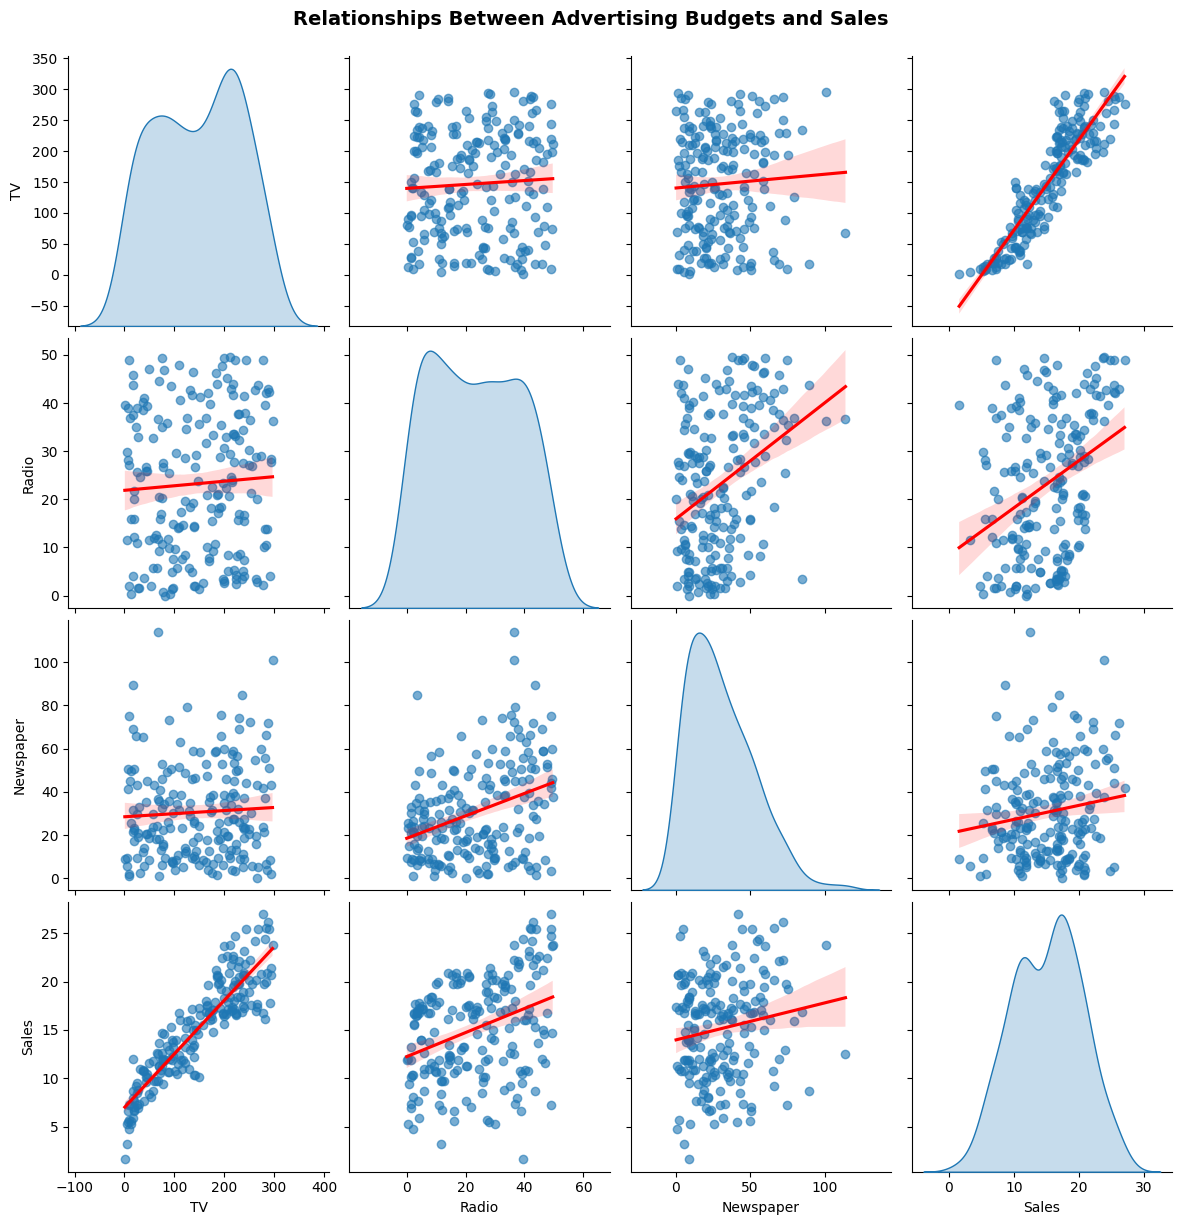

In [26]:
sns.pairplot(df, kind="reg", diag_kind="kde", height=3, aspect=1, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.6}})
plt.suptitle("Relationships Between Advertising Budgets and Sales", y=1.02, fontsize=14, fontweight='bold')
plt.show()

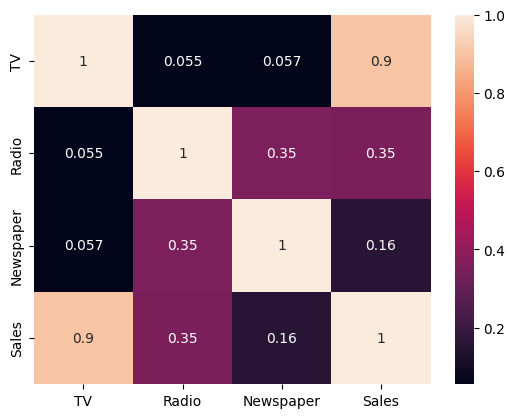

In [45]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Model Building

# Libraries

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Splitting

In [48]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print (X_train)

        TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[160 rows x 3 columns]


In [50]:
print(y_train)

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64


In [51]:
print(X_test)

        TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
115   75.1   35.0       52.7
69   216.8   43.9       27.2
170   50.0   11.6       18.4
174  222.4    3.4       13.1
45   175.1   22.5       31.5
66    31.5   24.6        2.2
182   56.2    5.7       29.7
165  234.5    3.4       84.8
78     5.4   29.9        9.4
186  139.5    2.1       26.6
177  170.2    7.8       35.2
56     7.3   28.1       41.4
152  197.6   23.3       14.2
82    75.3   20.3       32.5
68   237.4   27.5       11.0
124  229.5   32.3       74.2
16    67.8   36.6      114.0
148   38.0   40.3       11.9
93   250.9   36.5       72.3
65    69.0    9.3        0.9
60    53.5    2.0       21.4
84   213.5   43.0       33.8
67   139.3   14.5       10.2
125   87.2   11.8       25.9
132    8.4   27.2        2.1
9    199.8    2.6       21.2
18    69.2   20.5       18.3
55   198.9   49.4       60.0
75    16.9   4

In [52]:
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64


# Linear Regression

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Support Vector Machine (SVM)

In [54]:
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluation

In [55]:
metrics = pd.DataFrame({
    "Model": ["Linear Regression", "SVM Regression"],
    "MAE": [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_svm)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_svm))],
    "R2 Score": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_svm)]
})

metrics

,Model,MAE,RMSE,R2 Score
0,Linear Regression,1.274826,1.705215,0.905901
1,SVM Regression,1.483622,1.870585,0.886765


# Scatter Plots

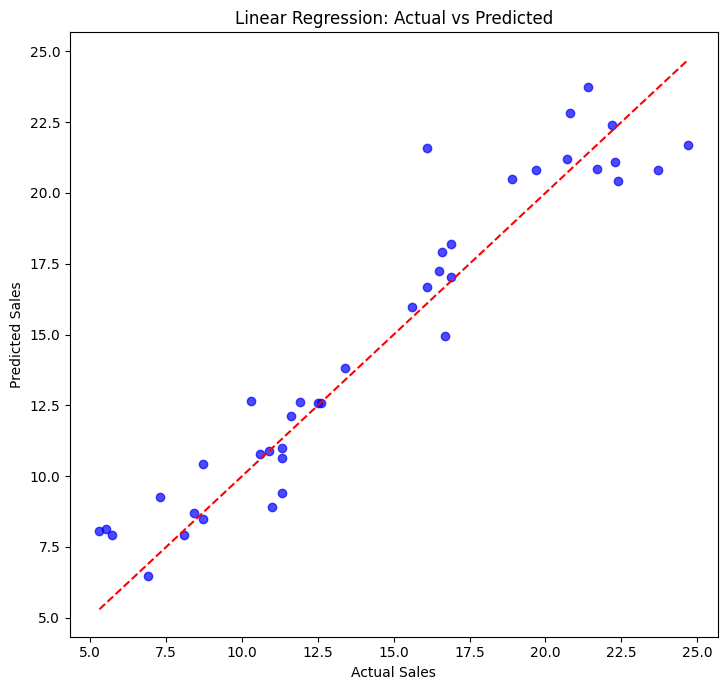

In [57]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.tight_layout()
plt.show()

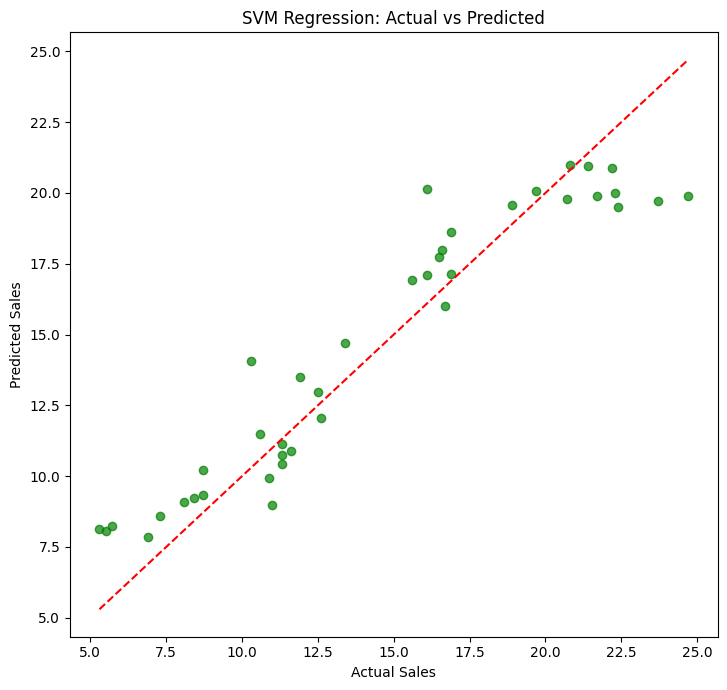

In [58]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_svm, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('SVM Regression: Actual vs Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.tight_layout()
plt.show()

# Conclusion

In [59]:
best_model = 'SVM Regression' if metrics.loc[1, 'R2 Score'] > metrics.loc[0, 'R2 Score'] else 'Linear Regression'

print(f"Based on the evaluation metrics, the best model for sales prediction is: {best_model}")
print("\nModel Evaluation Summary:")
print(metrics)

if best_model == 'SVM Regression':
    print("\nInsight: SVM Regression performs better in capturing complex non-linear relationships between features and sales, providing higher accuracy and a better R² score. This model is a good choice when the data exhibits intricate patterns or interactions that a simple linear model cannot capture.")
else:
    print("\nInsight: Linear Regression is a simpler and more interpretable model. It performs well when there is a linear relationship between the features and sales. This model is faster and requires less computational power, making it ideal for datasets with clear linear patterns.")

Based on the evaluation metrics, the best model for sales prediction is: Linear Regression

Model Evaluation Summary:
               Model       MAE      RMSE  R2 Score
0  Linear Regression  1.274826  1.705215  0.905901
1     SVM Regression  1.483622  1.870585  0.886765

Insight: Linear Regression is a simpler and more interpretable model. It performs well when there is a linear relationship between the features and sales. This model is faster and requires less computational power, making it ideal for datasets with clear linear patterns.
